<a href="https://colab.research.google.com/github/nse4real/myrepo/blob/master/group_2_stylometry_test_result_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Stylometry Test Evaluation for Grouping of 2

In [1]:
## Steps
#Read CSV file into the work space
# For each experiment, for each classifier, combine the splits by suming them and computing the average.
# For each classifier, compute the result for each experiment by summing them and averaging
# For each classifier, combine the result of each experiment and dispay
# Display precision and recall for author for each classifier
# Plot confusion matrices for each classifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#  import needed libraries
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import re, string, unicodedata
from tabulate import tabulate
import csv
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tabulate import tabulate

In [4]:
path = os.getcwd() + "/drive/MyDrive/Colab Notebooks/"
print("The present working directory",path)

filenames = ['output-group-2.csv','pca-output-group-2.csv']

The present working directory /content/drive/MyDrive/Colab Notebooks/


## Evaluation of output.csv with grouping = 1

This file contains the results from training the standard classifiers. The training is repeated 5 times(5 experements). The grouping of tweets in this file is 1. For each experiment, for each classifier, combine the splits by suming them and computing the average.

In [5]:
# read the csv file
output_csv_df = pd.read_csv(path+"output.csv")
output_csv_df = output_csv_df.astype({"cm": str})
# print number df rows and columns
##print(output_csv_df.shape)
#print the column names
#print(output_csv_df.columns)
print(output_csv_df.info())
print()

output_csv_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Experiment-Number  120 non-null    int64  
 1   Grouping-Number    120 non-null    object 
 2   Balance-Code       120 non-null    object 
 3   Classifier-Code    120 non-null    object 
 4   Split-Number       120 non-null    int64  
 5   Accuracy           120 non-null    float64
 6   Total-F1           120 non-null    float64
 7   cm                 120 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 7.6+ KB
None



,Experiment-Number,Grouping-Number,Balance-Code,Classifier-Code,Split-Number,Accuracy,Total-F1,cm
0,1,G-1,s,ann,0,0.323864,1.785553,"[[17, 18, 1, 28, 13, 96, 5, 67, 1, 7, 12, 59, ..."
1,1,G-1,s,svm,0,0.343182,2.073832,"[[55, 32, 35, 17, 9, 25, 30, 67, 17, 8, 13, 16..."


In [6]:
def convert_cm_to_confusion_matrix(group_cm):
  #print(len(group_cm))
  cm_lists = []
  for cm in group_cm:
    #print(cm)
    num = []
    ch_list = []
    index = 0
    while index < len(cm):
      if cm[index].isdigit():
        num.append(cm[index])
      else:
        if len(num)>0:
          ch_list.append(int("".join(num)))
          num = []
      index+=1
    #print(ch_list)
    cm_lists.append(ch_list)
  final_cm = np.array(cm_lists)
  #print(final_cm)
  f = np.sum(final_cm, axis=0)
  #print(f)
  return f

## group the data by classifier-code and split-number
grouped_df = output_csv_df.groupby(['Experiment-Number','Classifier-Code','Grouping-Number','Balance-Code'])
experiments_result = {
    'Experiment-Number':[],
    'Classifier-Code':[],
    'Grouping-Number':[],
    'Balance-Code':[],
    'Accuracy': [],
    'Total-F1': []
}
for i in range(0,36):
  experiments_result[i] = []

for name, group in grouped_df:
  experiments_result['Experiment-Number'].append(name[0])
  experiments_result['Classifier-Code'].append(name[1])
  experiments_result['Grouping-Number'].append(name[2])
  experiments_result['Balance-Code'].append(name[3])
  experiments_result['Accuracy'].append(np.mean(group['Accuracy']))
  experiments_result['Total-F1'].append(np.mean(group['Total-F1']))

  cm = convert_cm_to_confusion_matrix(group['cm'])
  for i in range(0,36):
    experiments_result[i].append(cm[i])
  
#print(experiments_result)
print("RESULT OF EACH CLASSIFIES FOR EACH EXPERIMENT")
df = pd.DataFrame(experiments_result)
display(df)

RESULT OF EACH CLASSIFIES FOR EACH EXPERIMENT


,Experiment-Number,Classifier-Code,Grouping-Number,Balance-Code,Accuracy,Total-F1,0,1,2,3,...,26,27,28,29,30,31,32,33,34,35
0,1,LR,G-1,s,0.325568,1.846997,114,160,49,67,...,14,40,282,71,49,84,42,37,129,217
1,1,NB,G-1,s,0.189489,0.753499,12,46,5,2,...,4,2,472,0,14,19,12,1,508,4
2,1,ann,G-1,s,0.330398,1.832572,77,145,28,113,...,12,46,261,97,30,68,33,58,79,290
3,1,dt,G-1,s,0.304830,1.653448,319,98,52,37,...,48,29,137,90,168,40,40,34,45,231
4,1,rf,G-1,s,0.367614,2.197486,197,144,104,94,...,34,48,238,67,91,32,47,53,54,281
5,1,svm,G-1,s,0.333239,1.989666,212,138,120,89,...,33,48,213,50,112,80,73,51,47,195
6,2,LR,G-1,s,0.325568,1.846997,114,160,49,67,...,14,40,282,71,49,84,42,37,129,217
7,2,NB,G-1,s,0.189489,0.753499,12,46,5,2,...,4,2,472,0,14,19,12,1,508,4
8,2,ann,G-1,s,0.334943,1.900911,151,127,37,91,...,21,49,266,75,63,67,30,48,92,258
9,2,dt,G-1,s,0.304830,1.653448,319,98,52,37,...,48,29,137,90,168,40,40,34,45,231


### Average Matrix for each classifier from 5 experiments

In [7]:
class_column = ['Classifier-Code', 'Accuracy','Total-F1']
class_column.extend(list(range(0,36)))
class_grouped_df = df[class_column].groupby(['Classifier-Code'])
classifier_result = {
    'Classifier-Code':[],
    'Accuracy': [],
    'Total-F1': []
}
for i in range(0,36):
  classifier_result[i] = []

for name, group in class_grouped_df:
  classifier_result['Classifier-Code'].append(name)
  classifier_result['Accuracy'].append(np.mean(group['Accuracy']))
  classifier_result['Total-F1'].append(np.mean(group['Total-F1']))
  for i in range(0,36):
    classifier_result[i].append(int(np.mean(group[i])))

print("RESULT OF EACH CLASSIFIES")
df2 = pd.DataFrame(classifier_result)
display(df2)

RESULT OF EACH CLASSIFIES


,Classifier-Code,Accuracy,Total-F1,0,1,2,3,4,5,6,...,26,27,28,29,30,31,32,33,34,35
0,LR,0.325568,1.846997,114,160,49,67,179,122,59,...,14,40,282,71,49,84,42,37,129,217
1,NB,0.189489,0.753499,12,46,5,2,619,7,13,...,4,2,472,0,14,19,12,1,508,4
2,ann,0.345057,1.958902,185,146,34,103,80,141,94,...,16,47,245,77,81,71,30,56,78,239
3,dt,0.304830,1.653448,319,98,52,37,61,124,226,...,48,29,137,90,168,40,40,34,45,231
4,rf,0.365966,2.191937,203,141,107,91,44,104,114,...,36,50,236,64,93,31,50,51,51,279
5,svm,0.333239,1.989666,212,138,120,89,40,92,99,...,33,48,213,50,112,80,73,51,47,195


### Precision, Recall,Confusion matrix for each classifier

Precision and recall for LR


Username       Precision    Recall
-----------  -----------  --------
Shteyngart      0.164978  0.311475
askanyone       0.540362  0.400978
harlancoben     0.137353  0.296029
megcabot        0.222022  0.31701
paulocoelho     0.549708  0.292228
tejucole        0.388889  0.307365


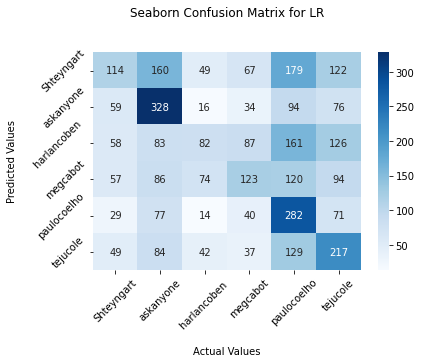

Precision and recall for NB


Username       Precision    Recall
-----------  -----------  --------
Shteyngart    0.0173661   0.210526
askanyone     0.205931    0.423729
harlancoben   0.0536013   0.367816
megcabot      0.0397112   0.431373
paulocoelho   0.920078    0.156915
tejucole      0.00716846  0.181818


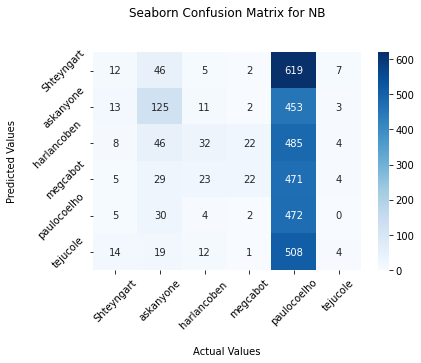

Precision and recall for ann


Username       Precision    Recall
-----------  -----------  --------
Shteyngart      0.268505  0.311448
askanyone       0.523102  0.402795
harlancoben     0.116162  0.308036
megcabot        0.284936  0.295669
paulocoelho     0.479452  0.404959
tejucole        0.430631  0.312418


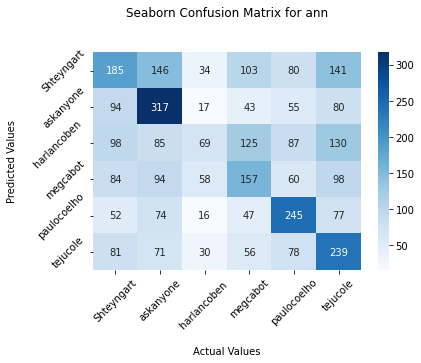

Precision and recall for dt


Username       Precision    Recall
-----------  -----------  --------
Shteyngart     0.46165    0.254589
askanyone      0.329489   0.392927
harlancoben    0.0988275  0.20068
megcabot       0.229242   0.367052
paulocoelho    0.267057   0.330918
tejucole       0.413978   0.328125


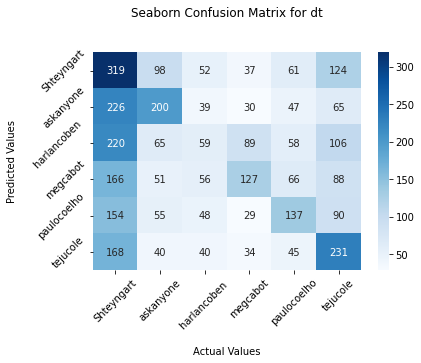

Precision and recall for rf


Username       Precision    Recall
-----------  -----------  --------
Shteyngart      0.294203  0.281163
askanyone       0.498344  0.428165
harlancoben     0.203361  0.263043
megcabot        0.264493  0.289109
paulocoelho     0.460938  0.491667
tejucole        0.502703  0.437304


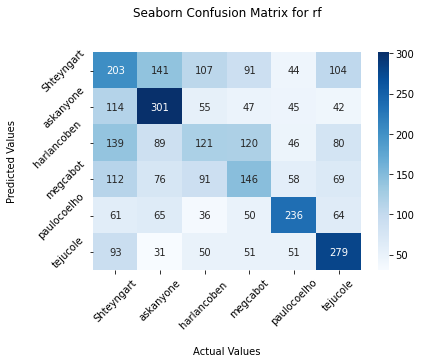

Precision and recall for svm


Username       Precision    Recall
-----------  -----------  --------
Shteyngart      0.306802  0.295676
askanyone       0.482702  0.340698
harlancoben     0.21273   0.247082
megcabot        0.240072  0.28976
paulocoelho     0.415205  0.470199
tejucole        0.349462  0.377176


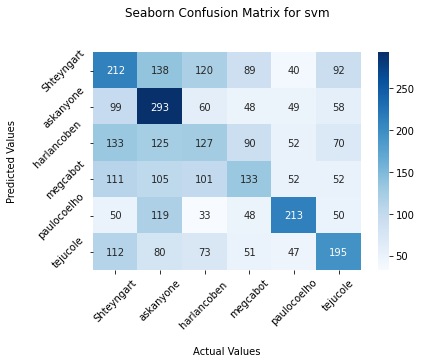

0    None
1    None
2    None
3    None
4    None
5    None
dtype: object

In [8]:
class_labels = ['Shteyngart', 'askanyone', 'harlancoben ', 'megcabot','paulocoelho', 'tejucole']

def print_precision_recall(cf_matrix):
  metrics = {"username":class_labels,"precision":[],"recall":[]}
  row_sum = np.sum(cf_matrix,axis=1)
  col_sum = np.sum(cf_matrix, axis=0)
  for i in range(len(class_labels)):
    metrics['precision'].append(cf_matrix[i,i]/row_sum[i]) 
    metrics['recall'].append(cf_matrix[i,i]/col_sum[i]) 
  print(tabulate(metrics,  headers=["Username","Precision","Recall"])) 

def plot_confusion_matrix(df_row):
  matrix_values = np.array(df_row.iloc[list(range(3,39))],dtype='i')
  cf_matrix = matrix_values.reshape(6, 6)

  print(f'Precision and recall for {df_row["Classifier-Code"]}\n\n')
  print_precision_recall(cf_matrix)

  ax = sns.heatmap(cf_matrix, fmt='g', annot=True, cmap='Blues')
  ax.set_title(f'Seaborn Confusion Matrix for {df_row["Classifier-Code"]}\n\n');
  ax.set_xlabel('\nActual Values')
  ax.set_ylabel('Predicted Values\n');
  ax.xaxis.set_ticklabels(class_labels,rotation=45)
  ax.yaxis.set_ticklabels(class_labels,rotation=45)
  ## Display the visualization of the Confusion Matrix.
  plt.show()

df2.apply(plot_confusion_matrix,axis=1)

## Evaluating for PCA output with grouping = 1

In [9]:
# read the csv file
pca_output_csv_df = pd.read_csv(path+"pca-output.csv")
pca_output_csv_df = pca_output_csv_df.astype({"cm": str})
# print number df rows and columns
#print(pca_output_csv_df.shape)
#print the column names
#print(pca_output_csv_df.columns)
print(pca_output_csv_df.info())
print()

pca_output_csv_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Experiment-Number  120 non-null    int64  
 1   Grouping-Number    120 non-null    object 
 2   Balance-Code       120 non-null    object 
 3   Classifier-Code    120 non-null    object 
 4   Split-Number       120 non-null    int64  
 5   Accuracy           120 non-null    float64
 6   Total-F1           120 non-null    float64
 7   cm                 120 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 7.6+ KB
None



,Experiment-Number,Grouping-Number,Balance-Code,Classifier-Code,Split-Number,Accuracy,Total-F1,cm
0,1,G-1,s,ann,0,0.315909,1.772319,"[[25, 52, 5, 17, 40, 34, 14, 88, 3, 5, 27, 14,..."
1,1,G-1,s,svm,0,0.343182,2.073832,"[[55, 32, 35, 17, 9, 25, 30, 67, 17, 8, 13, 16..."


In [10]:
## group the data by classifier-code and split-number
pca_grouped_df = pca_output_csv_df.groupby(['Experiment-Number','Classifier-Code','Grouping-Number','Balance-Code'])
pca_experiments_result = {
    'Experiment-Number':[],
    'Classifier-Code':[],
    'Grouping-Number':[],
    'Balance-Code':[],
    'Accuracy': [],
    'Total-F1': []
}
for i in range(0,36):
  pca_experiments_result[i] = []

for name, group in pca_grouped_df:
  pca_experiments_result['Experiment-Number'].append(name[0])
  pca_experiments_result['Classifier-Code'].append(name[1])
  pca_experiments_result['Grouping-Number'].append(name[2])
  pca_experiments_result['Balance-Code'].append(name[3])
  pca_experiments_result['Accuracy'].append(np.mean(group['Accuracy']))
  pca_experiments_result['Total-F1'].append(np.mean(group['Total-F1']))

  cm = convert_cm_to_confusion_matrix(group['cm'])
  for i in range(0,36):
    pca_experiments_result[i].append(cm[i])
  
#print(experiments_result)
print("PCA RESULT OF EACH CLASSIFIES FOR EACH EXPERIMENT")
pca_df = pd.DataFrame(pca_experiments_result)
display(pca_df)

PCA RESULT OF EACH CLASSIFIES FOR EACH EXPERIMENT


,Experiment-Number,Classifier-Code,Grouping-Number,Balance-Code,Accuracy,Total-F1,0,1,2,3,...,26,27,28,29,30,31,32,33,34,35
0,1,LR,G-1,s,0.324716,1.852975,161,159,45,68,...,14,39,274,63,77,86,37,34,125,199
1,1,NB,G-1,s,0.301136,1.616839,412,55,7,61,...,9,37,246,31,220,17,11,32,182,96
2,1,ann,G-1,s,0.357670,2.060352,208,159,34,90,...,18,38,251,78,82,76,27,49,82,242
3,1,dt,G-1,s,0.288352,1.574219,250,90,35,32,...,5,30,218,106,147,30,19,24,110,228
4,1,rf,G-1,s,0.371307,2.212454,226,130,100,85,...,29,58,244,68,99,53,53,42,57,254
5,1,svm,G-1,s,0.333239,1.989666,212,138,120,89,...,33,48,213,50,112,80,73,51,47,195
6,2,LR,G-1,s,0.324716,1.852975,161,159,45,68,...,14,39,274,63,77,86,37,34,125,199
7,2,NB,G-1,s,0.301136,1.616839,412,55,7,61,...,9,37,246,31,220,17,11,32,182,96
8,2,ann,G-1,s,0.359659,2.071718,179,169,75,65,...,21,24,254,81,73,82,41,40,76,246
9,2,dt,G-1,s,0.288352,1.574219,250,90,35,32,...,5,30,218,106,147,30,19,24,110,228


### Average Matrix for each classifier from 5 experiments

In [11]:
pca_class_grouped_df = pca_df[class_column].groupby(['Classifier-Code'])
pca_classifier_result = {
    'Classifier-Code':[],
    'Accuracy': [],
    'Total-F1': []
}
for i in range(0,36):
  pca_classifier_result[i] = []

for name, group in pca_class_grouped_df:
  pca_classifier_result['Classifier-Code'].append(name)
  pca_classifier_result['Accuracy'].append(np.mean(group['Accuracy']))
  pca_classifier_result['Total-F1'].append(np.mean(group['Total-F1']))
  for i in range(0,36):
    pca_classifier_result[i].append(int(np.mean(group[i])))

print("PCA RESULT OF EACH CLASSIFIER")
pca_df2 = pd.DataFrame(pca_classifier_result)
display(pca_df2)

PCA RESULT OF EACH CLASSIFIER


,Classifier-Code,Accuracy,Total-F1,0,1,2,3,4,5,6,...,26,27,28,29,30,31,32,33,34,35
0,LR,0.324716,1.852975,161,159,45,68,164,94,83,...,14,39,274,63,77,86,37,34,125,199
1,NB,0.301136,1.616839,412,55,7,61,118,38,270,...,9,37,246,31,220,17,11,32,182,96
2,ann,0.356818,2.067017,194,154,69,68,106,98,89,...,25,30,249,76,84,63,46,40,83,241
3,dt,0.288352,1.574219,250,90,35,32,121,163,183,...,5,30,218,106,147,30,19,24,110,228
4,rf,0.373182,2.224742,219,137,95,86,51,100,97,...,29,55,250,67,96,49,49,49,55,257
5,svm,0.333239,1.989666,212,138,120,89,40,92,99,...,33,48,213,50,112,80,73,51,47,195


### Precision, Recall,Confusion matrix for each classifier

PCA ANALYSIS


Precision and recall for LR


Username       Precision    Recall
-----------  -----------  --------
Shteyngart      0.232996  0.302632
askanyone       0.527183  0.391677
harlancoben     0.120603  0.277992
megcabot        0.211191  0.309524
paulocoelho     0.534113  0.297503
tejucole        0.356631  0.324633


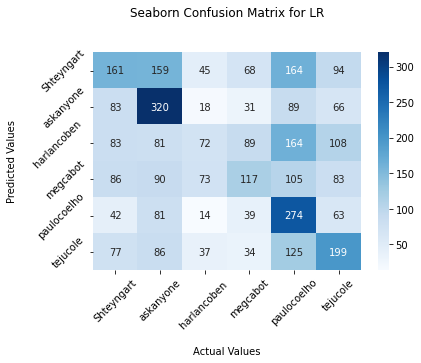

Precision and recall for NB


Username       Precision    Recall
-----------  -----------  --------
Shteyngart     0.596237   0.26981
askanyone      0.275124   0.46648
harlancoben    0.0636516  0.339286
megcabot       0.18231    0.29023
paulocoelho    0.479532   0.278281
tejucole       0.172043   0.329897


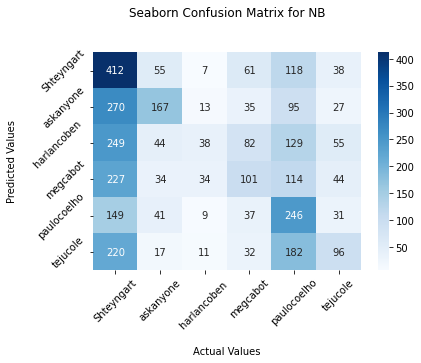

Precision and recall for ann


Username       Precision    Recall
-----------  -----------  --------
Shteyngart      0.281567  0.318033
askanyone       0.532231  0.400996
harlancoben     0.198319  0.307292
megcabot        0.235935  0.332481
paulocoelho     0.48728   0.367799
tejucole        0.432675  0.374806


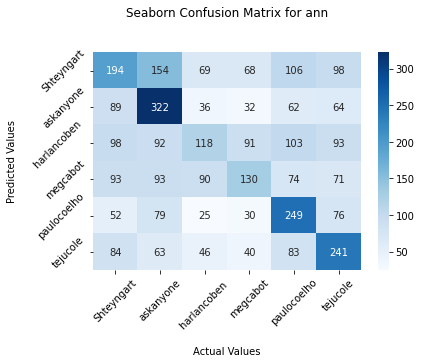

Precision and recall for dt


Username       Precision    Recall
-----------  -----------  --------
Shteyngart     0.361795   0.242954
askanyone      0.306425   0.42369
harlancoben    0.0569514  0.241135
megcabot       0.1787     0.356115
paulocoelho    0.424951   0.286842
tejucole       0.408602   0.261168


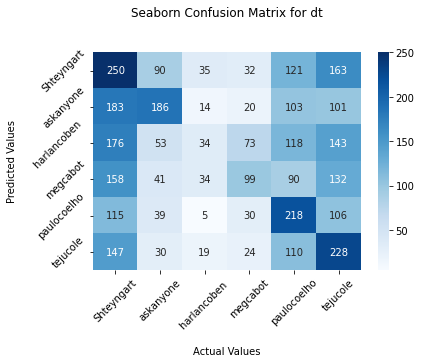

Precision and recall for rf


Username       Precision    Recall
-----------  -----------  --------
Shteyngart      0.318314  0.328336
askanyone       0.499174  0.422378
harlancoben     0.23569   0.304348
megcabot        0.259058  0.290061
paulocoelho     0.490196  0.479846
tejucole        0.463063  0.396605


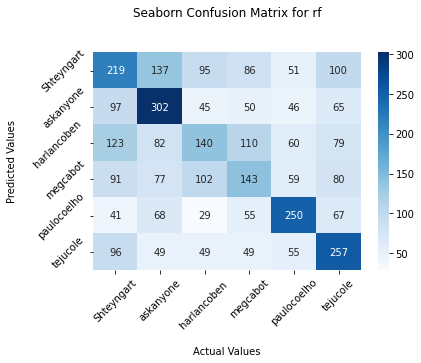

Precision and recall for svm


Username       Precision    Recall
-----------  -----------  --------
Shteyngart      0.306802  0.295676
askanyone       0.482702  0.340698
harlancoben     0.21273   0.247082
megcabot        0.240072  0.28976
paulocoelho     0.415205  0.470199
tejucole        0.349462  0.377176


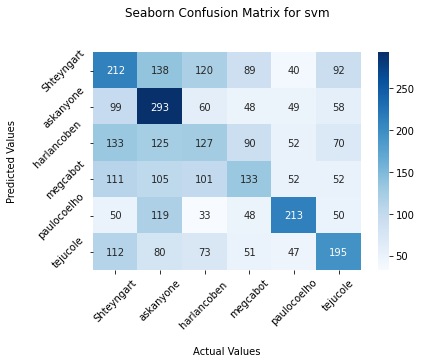

0    None
1    None
2    None
3    None
4    None
5    None
dtype: object

In [12]:
print("PCA ANALYSIS\n\n")
class_labels = ['Shteyngart', 'askanyone', 'harlancoben ', 'megcabot','paulocoelho', 'tejucole']
pca_df2.apply(plot_confusion_matrix,axis=1)